In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Preamble {-}

- This lab is going to look at the global water and energy balances, using a model and some satellite observations.
- The climate model data comes from CanESM5, the Canadian contribution to the last round of the global climate model intercomparison project (CMIP6). The data for this is in data/dataUpload
- The Satellite data comes from the CERES satellite EBAF product, which uses satellite radiometer measurements of the top of the atmosphere taken over many satellite passes to estimate the total energy imbalance of the planet. 

# Hints {-}
 - you don't *have* to use xarray to do these problems, but many of them are much easier if you do. See the Example lab for some ways to do this if you are unfamiliar. 
 - xarray has the ability to apply operations to different months with the where operation, e.g. to get the mean of all the Januarays in ds:

    ``` ds.where(ds.time.dt.month==1).mean()```

- you can take mean and standard deviations in xarray easily using ```.mean()``` and ```.std()```. Note if you don't specify a dimension it will take the mean or standard deviation over all dimensions.

- you can use pandas to make really nice tables with little titles, see the next cell for a little example.

In [2]:
dfo = pd.DataFrame(  np.random.randn(3,3),
                    columns=['1','2','3'],
                    index=['A','B','C'])

dfo.style.format('{:1.2e}').set_caption('Example Table')


,1,2,3
A,1.01e+00,-3.68e-01,3.09e-01
B,-3.51e-01,1.14e+00,1.10e+00
C,-1.63e+00,-1.09e+00,-5.89e-02


# Questions {-}

## 1. Global Water Balance Components from a climate model {-}

for this problem, you only need to use the CanESM data.

### 1.1 {-}
- Calculate the Evaporation, Precipitation, and Runoff averaged per $m^2$ of land
- Calculate the Evaporation, Precipitation, and Runoff averaged per $m^2$ of ocean

### 1.2 {-}
- Show that your calculations are consistent by comparing the Runoff estimated from the ocean with the runoff computed from the land. What assumption do you have to make in order to do this calculation?

## 2. Comparing the TOA energy balance of a climate model and observations {-}

### 2.1 {-}
- Compute the global and annual mean averaged components from CanESM5 and CERES. Note that CERES is only for the period 2000-2014, so you will need to subset the data from CanESM5 in order to make a fair comparison.

### 2.2 {-}
- what does the net TOA radiation tell us about the energy storage of the planet?
- Are the models and observations different? If they are, can you formulate a hypothesis about how the climates of the model differs from observations? Can you come up with a simple test of your hypothesis?

## 3. Calculating and interpreting monthly variability {-}

for this problem, you only need to use the CanESM data.

We're going to consider a variable $$h=\frac{MSE}{C_p}=T_{2m}+\frac{L_v}{C_p}q_{2m}$$

### 3.1 {-}
- compute the climatology of the monthly standard deviation, e.g. compute the monthly standard deviation of h every year, and then compute the mean over all years. Make a plot of this.
- now compute the difference between the mean of h in January and the mean of h in July, and plot it. Comparing this to the previous plot, what can you infer about the sources fo the standard deviation?

### 3.2 {-}
- Compute the climatology of the monthly standard deviations of $T_{2m}$ and $\frac{L_v}{C_p}q_{2m}$ separately. Where does each term contribute the most to the standard deviation?

### 3.3 {-}
- Which season, winter or summer, has more year to year variability in h? 

# Answers {-}

## 1. Global Water Balance Components from a climate model {-}

### 1.1 {-}
- The results are shown in Table 1.

### 1.2 {-}
- we should have $AOCN \times ROCN=ALND \times RLND$ if the runoff is calculated consistently. The calculations are shown in the cell below Table 1, they show that the residual is 2 orders of magnitude lower than the calculated runoff. To do this calculation we have assumed that the water storage in both the land and ocean isn't changing with time, otherwise the inequality would not hold. These changes in water storage may explain the residual.

## 2. Comparing the TOA energy balance of a climate model and observations {-}

### 2.1 {-}
- The results are shown in Table 2.

### 2.2 {-}
- The net TOA imbalance tells us about the rate of energy storage being taken up in the total Earth system (e.g. the land, ocean, and atmosphere combined).
- The models have a significantly higher TOA imbalance than the observations do. This implies that there is much more energy being taken up in the model compared with the observations, representing a large bias. A simple test of this hypothesis would be to compare the warming rate between the model and the observations, which should find that the model si warming faster than the observations.

## 3. Calculating and interpreting monthly variability {-}

for this problem, you only need to use the CanESM data.

We're going to consider a variable $$h=\frac{MSE}{C_p}=T_{2m}+\frac{L_v}{C_p}q_{2m}$$

### 3.1 {-}
- Figure 1 shows the standard devaitions, and figure 2 shows the absolute value of the difference between the july mean h and the january mean h. 
- Comparing the two plots shows us that the areas with the largest standard deviations are also the areas with the largest seasonal cycle (although the magnitudes are very different). This implies that the largest contribution to the monthly standard devaitions is the seasonal cycle (although the magnitudes are different, because we are comparing the two most extreme seasons with all seasons). Further evidence of this conclusion is that the largest standard deviations are over land, which has a large seasonal cycle because of the lower heat capacities. 

### 3.2 {-}
- Figures 4 and 5 show that the standard deviations of moisture are much larger over land, while the standard deviations of temperature are larger over the ocean. 

### 3.3 {-}
- Figure 3 shows a comparison between the standard deviations in january and july. We see that the largest standard deviations are always found in the winter hemisphere (e.g. DJF in the northern hemisphere and JJA in the southern hemisphere), so Winter has more year to year variability than summer.

# Notebook Cells {-}

# Question 1 {-}

In [4]:
# /home/rfajber/code/ClimateDynamicsCourse/data/EnergyWaterFluxData/CanESM_hfss_historical_r1i1p1f1.nc
indir='/home/rfajber/ClimateDynamicsCourse/data/EnergyWaterFluxData'
ds_C = xr.open_mfdataset('/home/rfajber/code/ClimateDynamicsCourse/data/EnergyWaterFluxData/CanESM*_historical_1970_r1i1p1f1.nc')

# ds_lh = xr.open_dataset('/home/rfajber/code/ClimateDynamicsCourse/data/EnergyWaterFluxData/CanESM5_hfls_historical_1970_r1i1p1f1.nc')
# ds_pr = xr.open_dataset('/home/rfajber/code/ClimateDynamicsCourse/data/EnergyWaterFluxData/CanESM5_pr_historical_1970_r1i1p1f1.nc')

lon = ds_C.lon.data
lat = ds_C.lat.data

# convert these to radians
rx = lon*np.pi/180.
ry = lat*np.pi/180.

# since the grid is constant in lon so can use a single rad element 
drx = rx[1]-rx[0]

# this is a little trick
# since the grid isn't evenly spaced on lat, going to find the latitudes at the points halfway between the grid points.
# then calculate dry at at the grid points by using the differences at the half points  
ryh = np.hstack([-np.pi/2,.5*(ry[1:]+ry[:-1]),np.pi/2])
dry = -(ryh[:-1]-ryh[1:])
cosy = np.cos(ry)

# this is the area element, but look at the shape:
dA = cosy*dry*drx

# dA is a 1d array, so we can broadcast it to 2d using np.meshgrid 
# we don't need the lon values, so just redirect those to null output
__,dA2 = np.meshgrid(lon,dA)


# create seperate land and ocean weights
WL = dA2 * ds_C.sftlf / 100. / (dA2 * ds_C.sftlf / 100.).sum()

WO = dA2 * (1. - ds_C.sftlf / 100.) / ( dA2 * (1. - ds_C.sftlf / 100.) ).sum()

W = dA2/dA2.sum()

# use the weights to calculate evaporation over land and ocean, calculate runoff as a residual

EL2 = (ds_C.hfls*WL).sum(dim=('lon','lat')).mean(dim='time').values/2.5e6
EO2 = (ds_C.hfls*WO).sum(dim=('lon','lat')).mean(dim='time').values/2.5e6
EL = (ds_C.evspsbl*WL).sum(dim=('lon','lat')).mean(dim='time').values
EO = (ds_C.evspsbl*WO).sum(dim=('lon','lat')).mean(dim='time').values
PL = (ds_C.pr*WL).sum(dim=('lon','lat')).mean(dim='time').values
PO = (ds_C.pr*WO).sum(dim=('lon','lat')).mean(dim='time').values
RL = PL - EL
RO = PO - EO

dfo = pd.DataFrame( [[EL,PL,RL],[EO,PO,RO]],
                    columns=['E','P','R'],
                    index=['Land','Ocean'])

dfo.style.format('{:1.2e}').set_caption('Table 1')


,E,P,R
Land,1.76e-05,2.61e-05,8.41e-06
Ocean,3.95e-05,3.61e-05,-3.40e-06


In [5]:
# to show that these balance we need to multiply them both by their respective areas
# dA2 is the area not including the radius of the earth, so we need to multiply it by the radius squared

a = 6.371*10**6

AO = (dA2 * (1. - ds_C.sftlf / 100.) ).sum().values
AL = (dA2 * (ds_C.sftlf / 100.) ).sum().values


print (f'Runoff calculated from Ocean:{RO*AO*a**2}')
print (f'Runoff calculated from Land:{RL*AL*a**2}')
print (f'Residual between runoff calculated from Ocean and from Land:{(RL*AL+RO*AO)*a**2}')


Runoff calculated from Ocean:-1236181107.7661035
Runoff calculated from Land:1235252644.7165952
Residual between runoff calculated from Ocean and from Land:-928463.0495083441


# Question 2 {-}

In [6]:
# the CERES data is from 2000 to 2015, so we need to average our data to be the same


ds_C2 = ds_C.sel(time=slice('2000-01-01','2015-12-31'))#.mean(dim='time')
#ds_C2.drop_vars('time_bnds')
ds_C2_m = (ds_C2*W).sum(dim=('lat','lon'))

days_in_month = ds_C2.time.dt.days_in_month
days_in_year = np.zeros(len(days_in_month)) + 365.0
mon_w = days_in_month/days_in_year

ds_C2_m_tm = (ds_C2_m*mon_w).groupby(ds_C2_m.time.dt.year).sum(dim='time').compute()

ds_C2_m_tm


<xarray.Dataset>
Dimensions:  (year: 15)
Coordinates:
    height   float64 2.0
    type     |S4 b'land'
  * year     (year) int64 2000 2001 2002 2003 2004 ... 2010 2011 2012 2013 2014
Data variables: (12/14)
    evspsbl  (year) float64 3.331e-05 3.339e-05 ... 3.362e-05 3.372e-05
    hfls     (year) float64 83.37 83.55 83.67 83.52 ... 84.35 83.95 84.14 84.38
    hfss     (year) float64 20.48 20.41 20.51 20.28 ... 20.05 20.01 20.27 20.17
    huss     (year) float64 0.01183 0.01186 0.01191 ... 0.01205 0.01219 0.01227
    pr       (year) float64 3.332e-05 3.339e-05 ... 3.362e-05 3.372e-05
    rlds     (year) float64 340.6 340.7 341.1 341.3 ... 343.8 342.8 343.8 344.6
    ...       ...
    rsds     (year) float64 188.1 188.5 188.6 187.9 ... 187.3 187.3 188.3 187.9
    rsdt     (year) float64 340.3 340.3 340.3 340.2 ... 340.2 340.2 340.2 340.2
    rsus     (year) float64 26.22 26.19 26.18 26.09 ... 25.88 25.79 25.81 25.85
    rsut     (year) float64 99.76 99.51 99.43 99.56 ... 99.39 99.27 98.46 98.76
    sftlf    (year) float64 28.79 28.79 28.79 28.79 ... 28.79 28.79 28.79 28.79
    tas      (year) float64 287.8 287.9 287.9 287.9 ... 288.2 288.1 288.3 288.4

In [28]:
ds_CERES=xr.open_dataset(f'../data/EnergyWaterFluxData/CERES_EBAF_v4.1_2000_2014_climatology.nc')
# ds_CERES=xr.open_dataset(f'/home/rfajber/data/CERES_EBAF_Ed4.2_Subset_CLIM01-CLIM12.nc')
# ds_CERES=ds_CERES.drop_vars('climatology_bounds')
# ds_CERES = ds_CERES.rename_dims({'ctime':'time'})

lon = ds_CERES.lon.data
lat = ds_CERES.lat.data

# convert these to radians
rx = lon*np.pi/180.
ry = lat*np.pi/180.

# since the grid is constant in lon so can use a single rad element 
drx = rx[1]-rx[0]

# this is a little trick
# since the grid isn't evenly spaced on lat, going to find the latitudes at the points halfway between the grid points.
# then calculate dry at at the grid points by using the differences at the half points  
ryh = np.hstack([np.pi/2,.5*(ry[1:]+ry[:-1]),-np.pi/2])
dry = (ryh[:-1]-ryh[1:])
cosy = np.cos(ry)

# this is the area element, but look at the shape:
dA = cosy*dry*drx

# dA is a 1d array, so we can broadcast it to 2d using np.meshgrid 
# we don't need the lon values, so just redirect those to null output
__,dA2 = np.meshgrid(lon,dA)
W = dA2/dA2.sum()

# technically some leap years got averaged together, but we're just going to ignore that.

mon_w2 = np.copy(mon_w[:12])

ds_CERES_m_tm = ((ds_CERES*W).sum(dim=('lon','lat'))*mon_w2).sum(dim='time')


In [23]:
ds_CERES_m_tm.toa_lw_all_clim

<xarray.DataArray 'toa_lw_all_clim' ()>
array(242.35386754)

In [24]:
ds_CERES_m_tm.toa_sw_all_clim

<xarray.DataArray 'toa_sw_all_clim' ()>
array(98.78982438)

In [25]:
ds_CERES_m_tm.solar_clim

<xarray.DataArray 'solar_clim' ()>
array(345.1463611)

In [26]:
(ds_CERES_m_tm.solar_clim - ds_CERES_m_tm.toa_sw_all_clim) - ds_CERES_m_tm.toa_lw_all_clim

<xarray.DataArray ()>
array(4.00266918)

In [30]:
dsl=[ds_CERES_m_tm,ds_C2_m_tm.mean(dim='year')]

dataTable=np.zeros([2,3])
for i,d in enumerate(dsl):
    dataTable[i,0]=d.rsdt-d.rsut
    dataTable[i,1]=d.rlut
    dataTable[i,2]=dataTable[i,0] - dataTable[i,1]

dfo = pd.DataFrame( 
    dataTable,
    columns=['netSW','netLW','net'],
    index=['CERES','CanESM']
)

dfo.style.format('{:1.2e}').set_caption('Table 2')


,netSW,netLW,net
CERES,2.41e+02,2.34e+02,6.87e+00
CanESM,2.41e+02,2.40e+02,9.92e-01


# Question 3 {-}

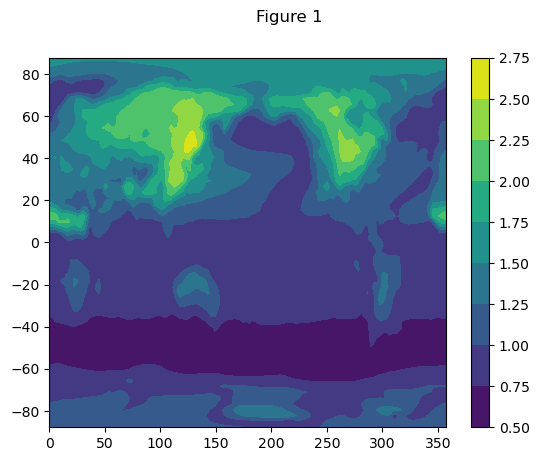

In [282]:
tm = ds_C.tas + 2.5e6/1e3 * ds_C.huss

plt.contourf( ds_C.lon,
ds_C.lat,
(tm*mon_w).std(dim='time')
)

plt.colorbar()

plt.suptitle('Figure 1')

plt.show()


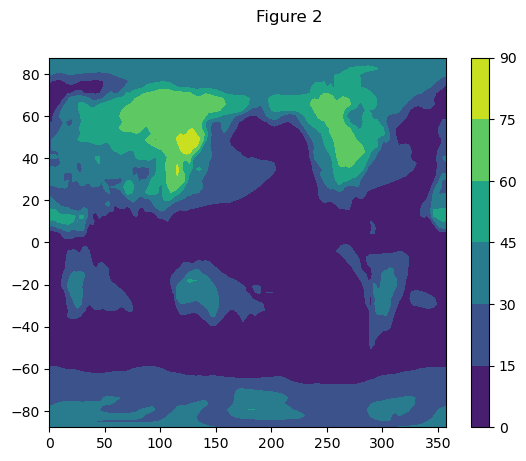

In [283]:
plt.contourf( ds_C.lon,
ds_C.lat,
np.abs( (tm).where(ds_C.time.dt.month==7).mean(dim='time')-
(tm).where(ds_C.time.dt.month==1).mean(dim='time') )
)
plt.colorbar()

plt.suptitle('Figure 2')

plt.show()


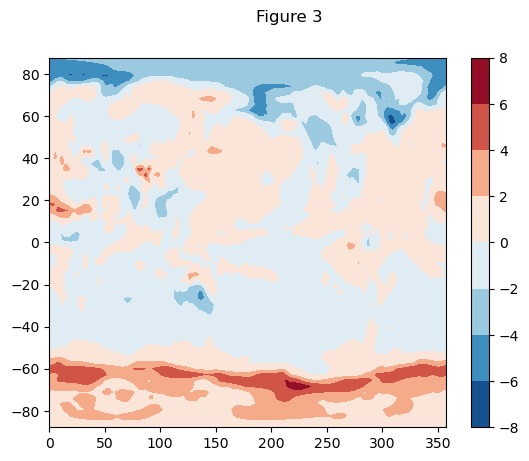

In [288]:
plt.contourf( ds_C.lon,
ds_C.lat,
(tm).where(ds_C.time.dt.month==7).std(dim='time')-
(tm).where(ds_C.time.dt.month==1).std(dim='time'),
cmap=plt.cm.RdBu_r 
)
plt.colorbar()

plt.suptitle('Figure 3')

plt.show()


Text(0.5, 0.98, 'Figure 4')

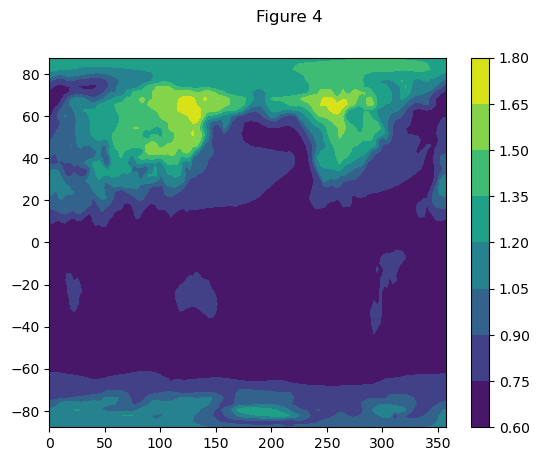

In [286]:
tm = ds_C.tas + 2.5e6/1e3 * ds_C.huss

plt.contourf( ds_C.lon,
ds_C.lat,
(ds_C.tas*mon_w).std(dim='time')
)

plt.colorbar()


plt.suptitle('Figure 4')


Text(0.5, 0.98, 'Figure 4')

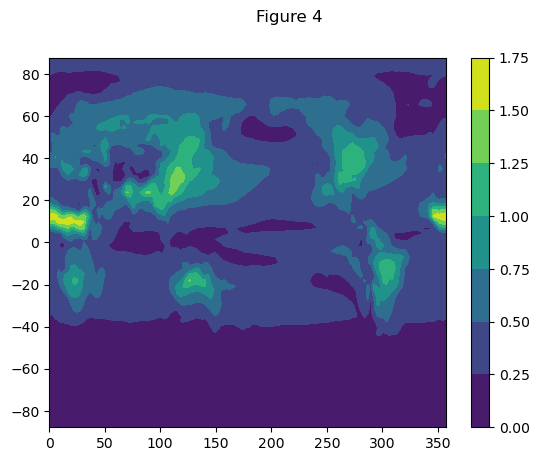

In [287]:

plt.contourf( ds_C.lon,
ds_C.lat,
( 2.5e6/1e3 * ds_C.huss*mon_w).std(dim='time')
)

plt.colorbar()


plt.suptitle('Figure 4')